In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

In [33]:
A = np.array([ [1,3], [1,3]])
print(np.linalg.det(A))

m = 100
A = np.random.randn(m, m)
A[:,0] = A[:,1]
print(np.linalg.det(A))

0.0
4.2125219863278806e+61


In [2]:
A = np.random.randn(6, 6)
print("original ", np.linalg.det(A))
T= A[[1,0,2,3,4,5], :]
print("Row swapp ", np.linalg.det(T))
T= A[[1,0,2,4,3,5], :]
print("Row swapp ", np.linalg.det(T))

original  -20.869175516941556
Row swapp  20.869175516941556
Row swapp  -20.869175516941556


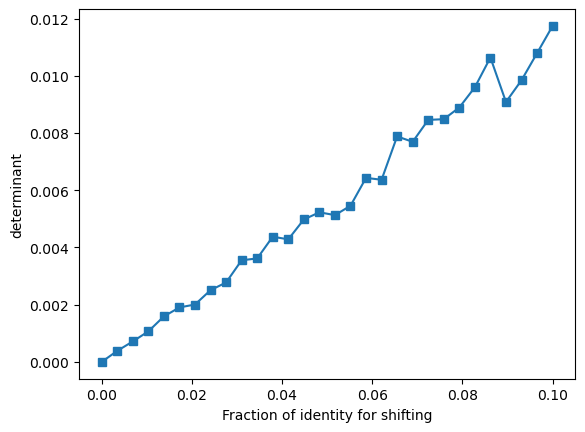

In [10]:
# determinant of shifted matrices
lambdas = np.linspace(0, .1, 30)

# initialize
tmp = np.zeros(1000)
dets = np.zeros(len(lambdas))

for deti in range(len(lambdas)):
    for i in range(1000):
        M = np.random.rand(20,20)
        M[:,0] = M[:,1]
        
        # compute det 
        tmp[i] = abs(np.linalg.det(M + lambdas[deti]*np.eye(20)))
    
    # compute average det
    dets[deti] = np.mean(tmp)

plt.plot(lambdas, dets, "s-")
plt.xlabel("Fraction of identity for shifting")
plt.ylabel("determinant")
plt.show()


In [13]:
A = np.random.randn(3, 3)
B = np.random.randn(3, 3)

print(np.linalg.det(A)*np.linalg.det(B))
print(np.linalg.det(A@B))

-5.084609646673258
-5.08460964667326


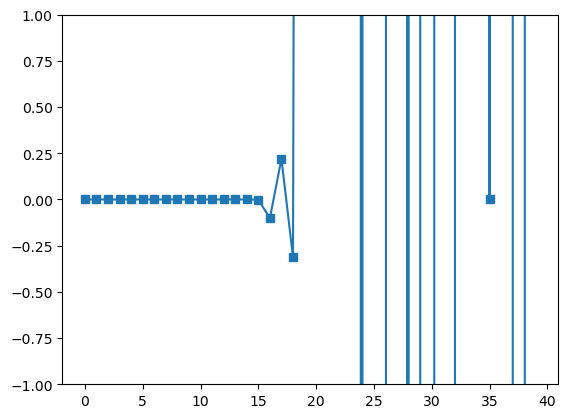

In [18]:
dets = np.zeros((40,2))

for k in range(40):
    A = np.random.randn(k, k)
    B = np.random.randn(k, k)
    
    dets[k, 0] = np.linalg.det(A) * np.linalg.det(B)
    dets[k, 1] = np.linalg.det(A@B)
plt.plot(dets[:,0] - dets[:,1], "s-")
plt.ylim([-1, 1])
plt.show()

[[ 1.00000000e+00  1.01311110e-17  2.52890140e-17]
 [ 6.17486388e-16  1.00000000e+00 -1.92618295e-16]
 [ 3.37583087e-17  3.24820025e-17  1.00000000e+00]]


Text(0.5, 1.0, 'AA$^{-1}$')

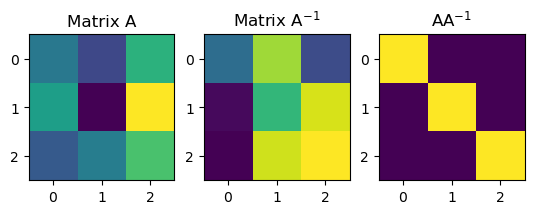

In [26]:
m = 3

A = np.random.randn(m, m)

Ainv = np.linalg.inv(A)

idm = A@Ainv
print(idm)

plt.subplot(131)
plt.imshow(A)
plt.title("Matrix A")

plt.subplot(132)
plt.imshow(Ainv)
plt.title("Matrix A$^{-1}$")

plt.subplot(133)
plt.imshow(idm)
plt.title("AA$^{-1}$")

In [5]:
# MCA algorithm

m = 4
A = np.random.randn(m, m)

minors = np.zeros((m, m))
H = np.zeros((m, m))

for i in range(m):
    for j in range(m):
        
        rows = [True] * m
        rows[i] = False
        
        cols = [True] * m
        cols[j] = False
        
        minors[i, j] = np.linalg.det(A[rows, :][:, cols])
        
        H[i, j] = (-1)**(i + j)
        
C = H * minors

Ainv = C.T/np.linalg.det(A)

print(A @ Ainv)

[[ 1.00000000e+00 -1.16860246e-16  4.20077963e-16  2.82833254e-17]
 [ 2.37322171e-16  1.00000000e+00  4.52750217e-16 -9.81417319e-16]
 [ 1.22014009e-16 -6.44818282e-17  1.00000000e+00  2.56236222e-15]
 [ 3.08869700e-16 -2.17945681e-17  1.57434456e-17  1.00000000e+00]]


In [7]:
Ainv2 = np.linalg.inv(A)
print(Ainv - Ainv2)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
